# A Simple Bandit Algorithm
Psudo-code for a simple K-armed Bandit problem is as follows:

$Q(a) \leftarrow 0$



In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import copy
%matplotlib inline
plt.style.use('seaborn-poster')


In [16]:
class multiarm_bandit():
    def __init__(self, n_arms, epsilon):
        # number of bandit problems (bandit arms)
        self.K = n_arms
        # probability of exploration
        self.epsilon = epsilon
        
        # np.random.seed(31)
        # action-value (expected reward given an action): $q_*(a)$
        # q = np.random.normal(loc=0, scale=1, size=K)
        self.q = np.random.randn(self.K)
        
        # actions available to select from
        self.actions = np.arange(self.K)

        # initialize estimated reward, Q(action)
        self.Q = np.zeros(self.K)

        # to count the number of times a given action is taken in the previous steps
        self.action_counter = np.zeros(self.K)

    def epsilon_greedy_policy(self):
        # find the argmax(Q(a)) and randomly break the ties if any happens
        exploit = np.random.choice(np.flatnonzero(self.Q == np.max(self.Q)))
        # select a random action with uniform distribution over actions
        explore = np.random.choice(self.actions)
        # Selecting between greedy and epsilon-greedy action-selection 
        # approaches can be modeled as a Bernoulli distribution.
        # Thus, we sample from binomial distribution for just one "coin toss"
        if_explore = bool(np.random.binomial(n=1, p=self.epsilon))
        # Based on epsilon probability choose explore or exploit and return according action
        return explore if if_explore else exploit

    def update_action_value_estimate(self, action):
        # define the reward function for each action. 
        # Sutton's book has set up a testbed for a 10-armed bandit problem.
        # In this problem, reward functions are normal distributions with 
        # mean equal to the true action-value and variance 1
        reward = np.random.normal(loc=self.q[action], scale=1)
        # Estimated action-value at step t, is an average of all rewards gained 
        # prior to the current step of the same episod for a given action
        self.action_counter[action] += 1
        self.Q[action] += 1/self.action_counter[action] * (reward - self.Q[action])
        return reward

    def run(self, n_steps=100):
        # number of steps per episod

        # initialize cumulative average rewards
        self.reward = np.zeros(n_steps)
        # metrics: to initialize optimal action percentage vector
        self.optimal_action_count = np.zeros(n_steps)

        for t in range(n_steps):
            # at step t:
            # pick an action
            action_t = self.epsilon_greedy_policy()
            # find the actual reward
            reward_t = self.update_action_value_estimate(action_t)
            # calculate cumulative average reward per step up to the current step t
            self.reward[t] = self.reward[t-1] + 1/(t + 1) * (reward_t - self.reward[t-1])
            # metrics: to find optimal action count 
            self.optimal_action_count[t] = 1 if (action_t==np.argmax(self.q)) else 0
            
        return 


In [17]:
K = 10
epsilons = [0.0, 0.1, 0.01]
n_steps = 1000
episodes = 2000

np.random.seed(31)

# initialize average rewards per step
avg_reward = {eps:np.zeros(n_steps) for eps in epsilons}

# find optimal reward per step
optimal_reward_per_step = {eps: 0 for eps in epsilons}
percent_optimal_action = {eps: np.zeros(n_steps) for eps in epsilons}
# run for number of episodes
for n in range(episodes):
    # run each policy for a defined number of episodes
    epsilon_greedy_policy = {eps:multiarm_bandit(n_arms=K, epsilon=eps) for eps in epsilons}
    for eps in epsilons:
        policy = epsilon_greedy_policy[eps]
        policy.run(n_steps)
        # calculate average rewards over multiple episodes
        avg_reward[eps] += 1/(n+1) * (policy.reward - avg_reward[eps])
        optimal_reward_per_step[eps] += 1/(n+1) * (np.max(policy.q) - optimal_reward_per_step[eps])
        percent_optimal_action[eps] += 1/(n+1) * (policy.optimal_action_count - percent_optimal_action[eps])


optimal_reward_per_step = round(np.mean(list(optimal_reward_per_step.values())), ndigits=2)
print("Optimal reward value per step is: ", optimal_reward_per_step)


Optimal reward value per step is:  1.54


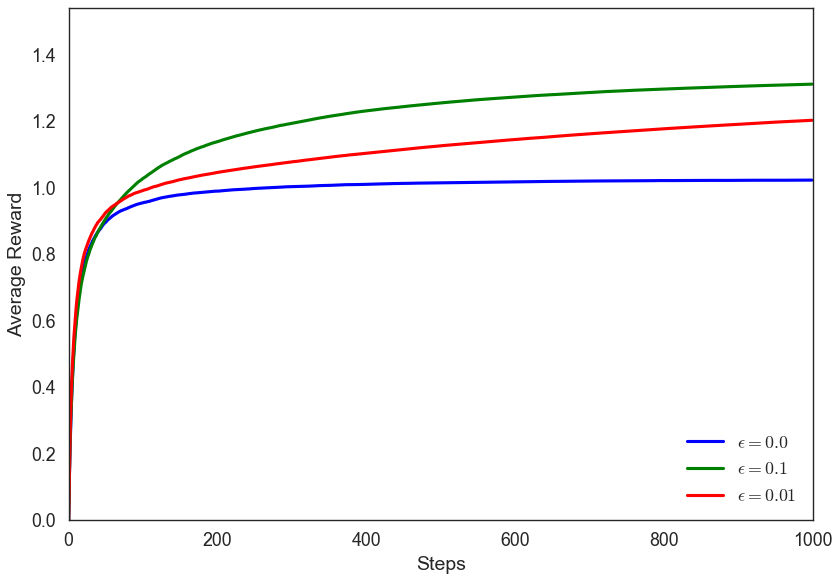

In [57]:
plt.figure(figsize=(12,8))
for eps in epsilons:
    plt.plot(avg_reward[eps], label="$\epsilon={0}$".format(eps))

plt.ylim(0, optimal_reward_per_step)
plt.legend(bbox_to_anchor=(1.0, 0.2))
plt.xlabel("Steps")
plt.ylabel("Average Reward")
# plt.title("Average performance of $\epsilon-greedy$ action-value methods on the {0}-armed testbed. \
#           \n The optimal action per step is {1}".format(K, optimal_reward_per_step))
plt.savefig('Exp1a', transparent=True, bbox_inches='tight')
# plt.show()


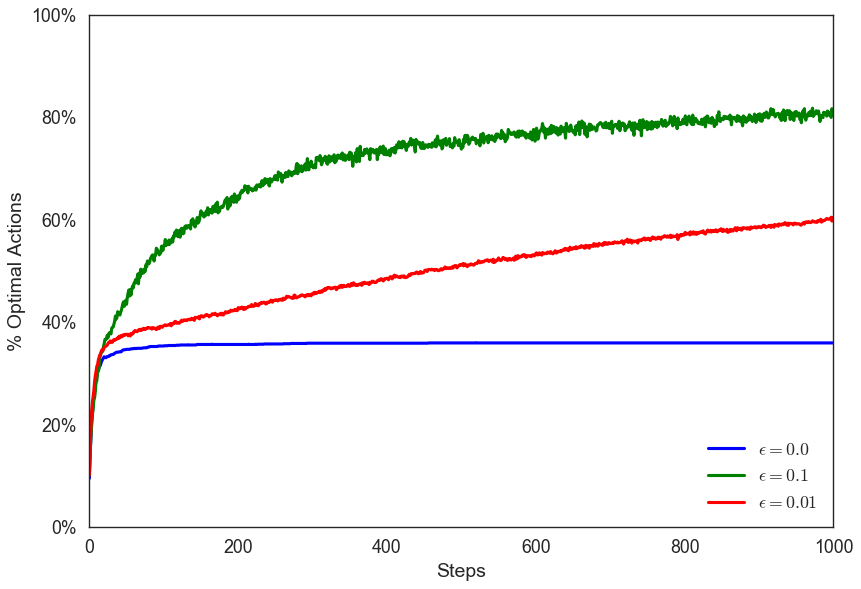

In [59]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

exp1_percent_optimal_action = copy.deepcopy(percent_optimal_action)

for eps in epsilons:
    plt.plot(percent_optimal_action[eps], label="$\epsilon={0}$".format(eps))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) 
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.0, 0.2))
plt.xlabel("Steps")
plt.ylabel("% Optimal Actions")
# plt.title("Ratio of optimal action selection using $\epsilon-greedy$ action-value methods on the {0}-armed testbed. \
#           \n The optimal action per step is {1}".format(K, optimal_reward_per_step))
plt.savefig('Exp1b', transparent=True, bbox_inches='tight')
# plt.show()


In [60]:
K = 10
epsilons = [0.0, 0.1, 0.01]
n_steps = 1000
episodes = 2000

np.random.seed(31)

# initialize average rewards per step
avg_reward = {eps:np.zeros(n_steps) for eps in epsilons}

# find optimal reward per step
optimal_reward_per_step = {eps: 0 for eps in epsilons}
percent_optimal_action = {eps: np.zeros(n_steps) for eps in epsilons}
# run for number of episodes
for n in range(episodes):
    # run each policy for a defined number of episodes
    epsilon_greedy_policy = {eps:multiarm_bandit(n_arms=K, epsilon=eps) for eps in epsilons}
    
    for eps in epsilons:
        policy = epsilon_greedy_policy[eps]
        #initialize expected action value
        policy.Q = np.ones(policy.K) * 5.0
        policy.run(n_steps)
        # calculate average rewards over multiple episodes
        avg_reward[eps] += 1/(n+1) * (policy.reward - avg_reward[eps])
        optimal_reward_per_step[eps] += 1/(n+1) * (np.max(policy.q) - optimal_reward_per_step[eps])
        percent_optimal_action[eps] += 1/(n+1) * (policy.optimal_action_count - percent_optimal_action[eps])


optimal_reward_per_step = round(np.mean(list(optimal_reward_per_step.values())), ndigits=2)
print("Optimal reward value per step is: ", optimal_reward_per_step)


Optimal reward value per step is:  1.53


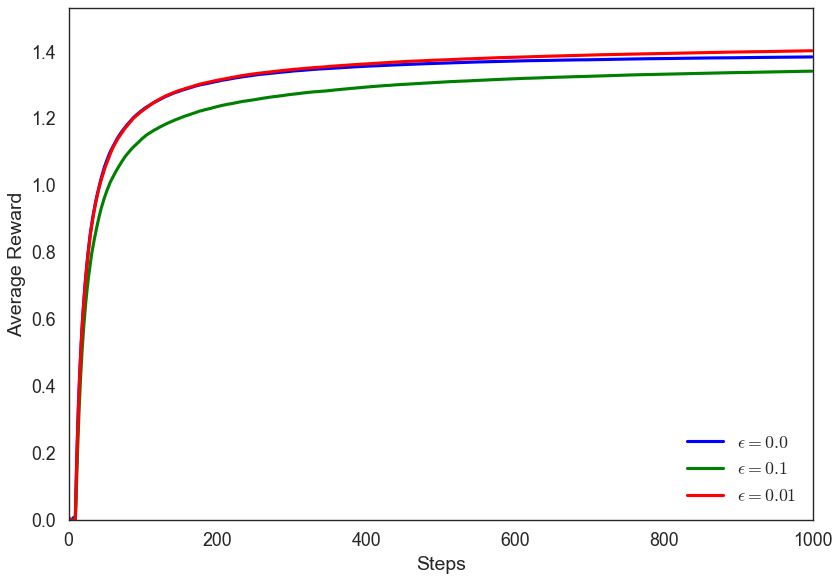

In [61]:
plt.figure(figsize=(12,8))

for eps in epsilons:
    plt.plot(avg_reward[eps], label="$\epsilon={0}$".format(eps))

plt.ylim(0, optimal_reward_per_step)
plt.legend(bbox_to_anchor=(1.0, 0.2))
plt.xlabel("Steps")
plt.ylabel("Average Reward")
# plt.title("Average performance of $\epsilon-greedy$ action-value methods on the {0}-armed testbed. \
#           \n The optimal action per step is {1}".format(K, optimal_reward_per_step))
plt.savefig('Exp2a', transparent=True)
# plt.show()


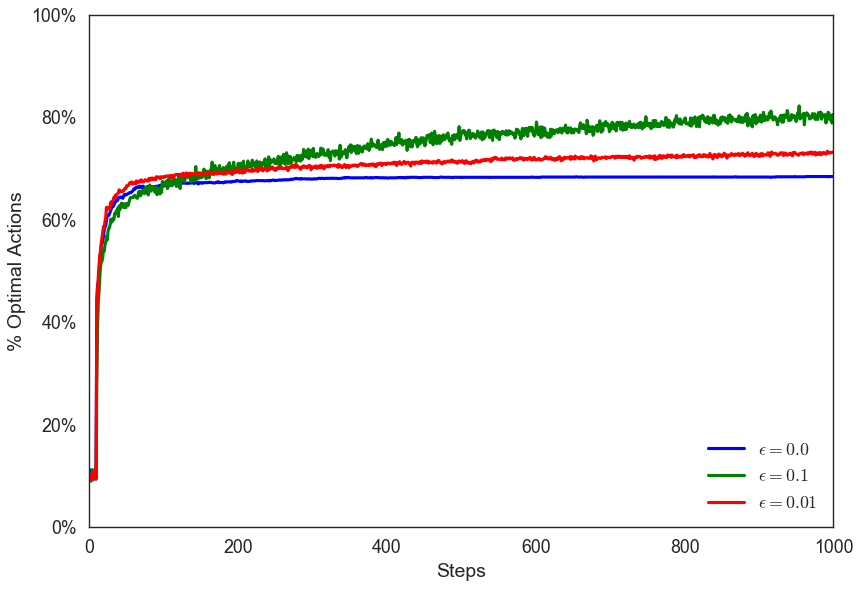

In [62]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

exp2_percent_optimal_action = copy.deepcopy(percent_optimal_action)

for eps in epsilons:
    plt.plot(percent_optimal_action[eps], label="$\epsilon={0}$".format(eps))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) 
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.0, 0.2))
plt.xlabel("Steps")
plt.ylabel("% Optimal Actions")
# plt.title("Ratio of optimal action selection using $\epsilon-greedy$ action-value methods on the {0}-armed testbed. \
#           \n The optimal action per step is {1}".format(K, optimal_reward_per_step))
plt.savefig('Exp2b', transparent=True)
# plt.show()

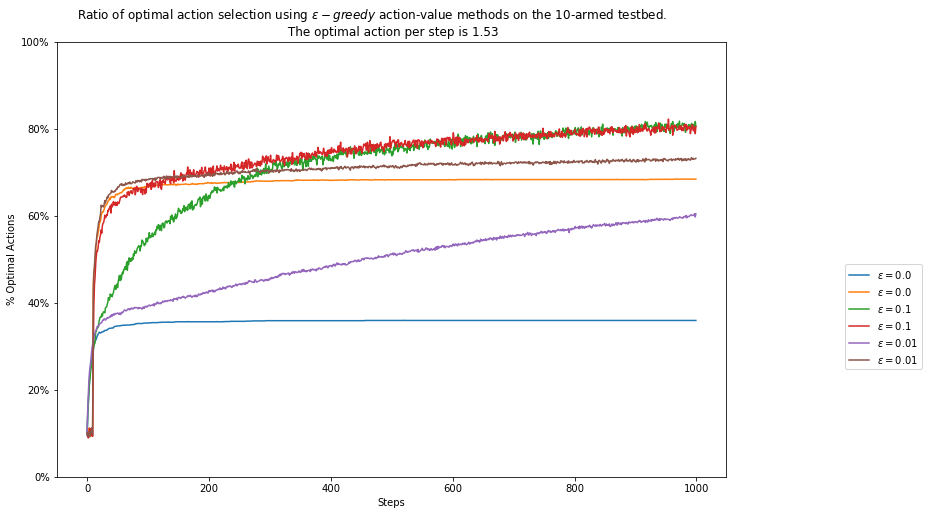

In [13]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

for eps in epsilons:
    plt.plot(exp1_percent_optimal_action[eps], label="$\epsilon={0}$".format(eps))
    plt.plot(exp2_percent_optimal_action[eps], label="$\epsilon={0}$".format(eps))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) 
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.0, 0.2))
plt.xlabel("Steps")
plt.ylabel("% Optimal Actions")
plt.title("Ratio of optimal action selection using $\epsilon-greedy$ action-value methods on the {0}-armed testbed. \
          \n The optimal action per step is {1}".format(K, optimal_reward_per_step))
# plt.savefig('Exp3', transparent=True)
plt.show()